### Student Information
Name: Deniz Can Ozer 詹奧澤

Student ID: NE6148418

GitHub ID: https://github.com/Deniz-Can

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [ ]:
### Begin Assignment Here
### same tasks as in phase 1 master notebook applied to the new dataset

# necessary libraries
#
import pandas as pd
import plotly.express as px
import plotly as py
import math 
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# general preparations & set-up
#
data_path = '/Users/denizcanozer/Documents/Uni_and_Career/TUM/TUM_MSc_RCI_2024/***TUM_MSc_RCI_Organizational/Exchange or Stay Abroad/TUMexchange at NCKU in WS2526/*NCKU Courses Fall 2025/1) DMCTA/DMCTA_Labs/Lab1/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv'
df_raw = pd.read_csv(data_path)
n_rows_raw,n_columns_raw = df_raw.shape

# how does the data table/ dimensionality look like:
print(f"#rows: {n_rows_raw}, #columns: {n_columns_raw}")

# nr. of records (rows) w/ a specific lable: to spot any imbalances
counts = df_raw["label"].value_counts(dropna=False)
percentage_counts = (counts/counts.sum()*100).round(1)
summary_counts = pd.DataFrame({
    "count": counts,
    "percentage": percentage_counts
})
summary_counts["percentage"] = summary_counts["percentage"].astype(str) + "%"
display(summary_counts)
print(df_raw.head(3))

# translation of numeric lables to textual
label_map ={
    1.0: "positive", 0.0: "neutral", -1.0: "negative" 
}
df_raw["label_name"] = df_raw["label"].map(label_map)
print(df_raw[["label","label_name"]].head())           # prints first 5 labels


# data preprocessing and preparation
#
# cols_to_drop = ['post_id','url','datetime','author','entities','type','downvotes','upvote_ratio']

# find and drop all records w/ missing/ invalid target labels, keep all columns (actually 0)
valid_labels = {-1, 0, 1}
invalid_label_mask = ~df_raw["label"].isin(valid_labels)
n_invalid = invalid_label_mask.sum()
print(f"nr. of invalid or missing labels: {n_invalid}")

# find and drop all records w/ missing/ empty string text or titles (actually zero)
invalid_title_mask = (
    df_raw["title"].isna() | df_raw["title"].astype(str).str.strip().eq("")
)
invalid_text_mask = (
    df_raw["text"].isna() | df_raw["text"].astype(str).str.strip().eq("")
)
print(f"#rows w/ missing/empty title: {invalid_title_mask.sum()}")
print(f"#rows w/ missing/empty text: {invalid_text_mask.sum()}")


# unused columns/ features to simplify the problem
#most useful: title, text, label
#useful for visualizations and meta-analysis: datetime, subreddit, type, upvotes, downvotes, upvote-ratio, entities
#useful for debugging/ traceability: post-id
#dropped columns: author, url, subjectivity, polarity, sentiment



#rows: 847, #columns: 16


,count,percentage
label,,
0.0,423,49.9%
-1.0,315,37.2%
1.0,109,12.9%


      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1

In [51]:
### EXERCISE 1 ###
# print out text data and category for the first 3 samples in the dataset
# text data (title and text) and label will be printed out

for i in range(3):
    title_and_text = (df_raw.loc[i,"title"] + " | " + df_raw.loc[i,"text"]).strip()
    print(f"Reddit entry title and text {i+1}:\n{title_and_text}\n")
    print(f"Label: {df_raw.loc[i,'label']} (label={df_raw.loc[i,'label_name']})\n")


# # only text (not title)
# for i in range(3):
#     print(f"Reddit entry text {i+1}:\n{df_raw.loc[i,'text'].strip()}\n")
#     print(f"Label: {df_raw.loc[i,'label']} (label={df_raw.loc[i,'label_name']})\n")

Reddit entry title and text 1:
Retardation is on the menu boys! WSB is so back | Calls on retards

Label: -1.0 (label=negative)

Reddit entry title and text 2:
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history | Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

Label: 0.0 (label=neutral)

Reddit entry title and text 3:
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision? | Seeing lots of red in the ticker.

Label: 0.0 (label=neutral)



In [63]:
### EXERCISE 2 ###
# Experiment with other querying techniques using pandas dataframes. Refer to their documentation.

# build Pandas data frame
cols = [
    "type","datetime","post_id","subreddit","title","author","url","upvotes","downvotes","upvote_ratio","text",
    "subjectivity","polarity","sentiment","entities","label"
]
X = pd.DataFrame(df_raw[cols].copy())

# add label_name to the frame
X["label_name"] = X["label"].map(label_map)
display(X.head())


# query techniques

# 1) boolean indexing (filtering by a condition such as specific label)
# get all rows where label is -1
negative_entries = X[X["label"] == -1]
print(f"Found {len(negative_entries)} entries labelled negative")

# 2) using string search (filtering by text content)
# get all rows where text contains the word 'TSLA' (case-insensitive)
tsla_entries = X[X["text"].str.contains("TSLA",case=False,na=False)]
print(f"Found {len(tsla_entries)} entries containing the word 'TSLA'")

# 3) the .query() method (filtering by complex/ specific conditions like SQL)
# get all rows where subreddit is "wallstreetbets" and label is neutral
wsb_neutral_entries = X.query('subreddit == "wallstreetbets" and label == 0')
print(f"Found {len(wsb_neutral_entries)} entries in subreddit 'wallstreetbets' with neutral label (0)")

# 4) the .isin() method (filtering by a list of values)
# useful for filtering by multiple labels without using long OR statements
target_labels = [-1,1]
polarizing_entries = X[X["label"].isin(target_labels)]
print(f"Found {len(polarizing_entries)} entries which are either negative (-1) or positive (-1)")

# 5) random sampling with .sample() (getting a random subset of entries)
random_entries = X.sample(n=2, random_state=42)
print("Randomly selected 2 entries:")
print(random_entries)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,negative
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,neutral
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,neutral
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,positive
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,negative


Found 315 entries labelled negative
Found 3 entries containing the word 'TSLA'
Found 79 entries in subreddit 'wallstreetbets' with neutral label (0)
Found 424 entries which are either negative (-1) or positive (-1)
Randomly selected 2 entries:
        type             datetime  post_id       subreddit  \
457  comment  2025-04-11 15:42:58  mmkwda9     StockMarket   
342  comment   2025-04-12 3:04:05  mmob98a  wallstreetbets   

                                                 title              author  \
457  Trump: We Are Doing Really Well On Our Tariff ...  IamNotaMonkeyRobot   
342  Retail giant TARGET has now declined for 10 co...    iPlayedHockeInHS   

                                      url  upvotes  downvotes  upvote_ratio  \
457   https://i.redd.it/uajqu4kxl7ue1.png        1        NaN           NaN   
342  https://i.redd.it/7tl6puv9waue1.jpeg        1        NaN           NaN   

               text  subjectivity  polarity  sentiment               entities  \
457       "We" 

In [70]:
### EXERCISE 3 ###

# filter by 'neutral' label and query every 10th record and print only the first 5 results

X[X["label"] == 0][::10].head(5)

# or just display selected columns
# X[X["label"] == 0][::10].head(5)[["title","text","label","label_name"]]


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,neutral
22,comment,2025-04-12 2:46:28,mmo8obq,wallstreetbets,Retail giant TARGET has now declined for 10 co...,tiredsultan,https://i.redd.it/7tl6puv9waue1.jpeg,5,NaN,NaN,"Google ""target dei"".\n\nI did it for you.\n\n",0.000000,0.000000,0.0,"['dei', 'Google', 'target']",0.0,neutral
40,comment,2025-04-11 22:00:36,mmmyq7m,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,InstructionNo4546,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,These China AI factory memes are pretty good. ...,0.800000,0.475000,1.0,"['factory', 'time', 'AI', 'China AI', 'China',...",0.0,neutral
55,comment,2025-04-11 16:00:46,mml01xt,stocks,The US bond market is continuing to crash. Wil...,J3ster14,https://www.reddit.com/r/stocks/comments/1jwsz...,1,NaN,NaN,The steal,0.000000,0.000000,0.0,['steal'],0.0,neutral
72,post,2025-04-04 6:25:04,1jr5ag5,stockstobuytoday,Spending first $250 tmmw on stocks,Alarmed_Champion_913,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,"['cuz', 'OPTT', 'BLGO', 'im', 'money', 'idea',...",0.0,neutral


In [71]:
### EXERCISE 4 ###
# calculate missing values per row (for every record) using axis
# returns a panda series with the 1st column showing the document index and the 2nd column showing the count of missing values in that row

X.isnull().sum(axis=1)

0      2
1      2
2      2
3      0
4      2
      ..
842    2
843    2
844    0
845    2
846    2
Length: 847, dtype: int64

In [ ]:
### EXERCISE 5 ###
# This was an explanation task independent of the dataset at hand. So, the same explanation holds generally.

#explanation:
#observation and explanation
# The .isnull() method only identifies actual NaN values (np.nan) as missing and thus failed to identify rows 2, 3, and 5 
# as missing because technically they are not NaN values but string representations or empty strings.
# It only idetifed row 0, 1, and 4 correctly as missing.
# It returned False for the strings 'NaN', 'None', and the empty string'' which is incorrect for our goal.
# This happens because .isnull() only checks for np.nan values and does not consider other representations of missing data.
# It does not automatically interpret strings like 'NaN' or 'None' as missing values. Strings are considered valid entries -
# this holds for the empty string as well, which is a string of length zero but still a valid string.


In [ ]:
### EXERCISE 6 ###

# check whether there are duplicate rows/ records
nr_duplicates = sum(X.duplicated())
print(f"nr. of entire duplicate rows: {nr_duplicates}")
nr_duplicate_titles = sum(X.duplicated('title'))
nr_duplicate_texts = sum(X.duplicated('text'))
nr_duplicate_authors = sum(X.duplicated('author'))
print(f"nr. of duplicate titles: {nr_duplicate_titles}\nnr. of duplicate texts: {nr_duplicate_texts}\nnr. of duplicate authors: {nr_duplicate_authors}")


# ex. 6: changes to the dataframe after sampling
# sampling the dataframe
X_sample = X.sample(n=333)
# compare size (nr. of rows)
print(f"\nOriginal X rows: {len(X)}")
print(f"Sampled X_sample rows: {len(X_sample)}")

# check the indices (order of the data)
print(f"\nFirst 5 indices of original X: {X.index[:5].tolist()}")
print(f"First 5 indices of X_sample: {X_sample.index[:5].tolist()}")

# observation
# To create X_sample, 333 records were randomly selected from X without replacement.
# Therefore, X_sample contains a subset of rows from X, but the order of rows in X_sample does not match the original order in X.
# The indices in X_sample correspond to the original indices in X, but they are not sequential because of the random sampling process.
# The X dataframe has sequential indices.

nr. of entire duplicate rows: 0
nr. of duplicate titles: 720
nr. of duplicate texts: 23
nr. of duplicate authors: 116

Original X rows: 847
Sampled X_sample rows: 333

First 5 indices of original X: [0, 1, 2, 3, 4]
First 5 indices of X_sample: [494, 681, 736, 249, 66]


{1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}

label_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64

label_name
neutral     160
negative    124
positive     49
Name: count, dtype: int64


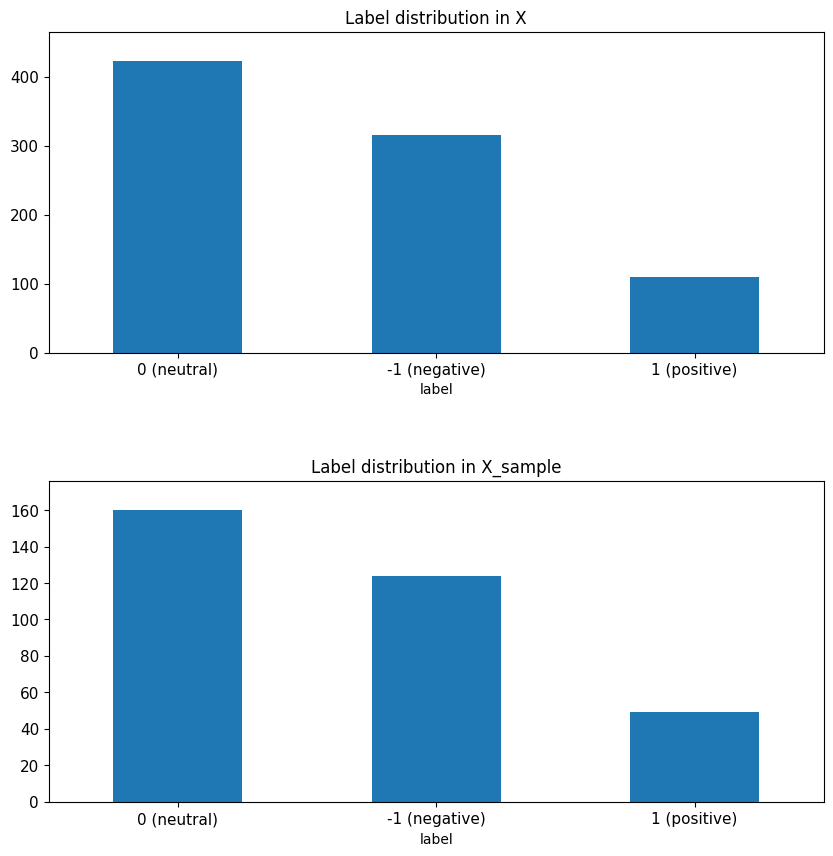

In [109]:
### EXERCISE 7 ###

import matplotlib.pyplot as plt

print(label_map)
print(f"\n{X.label_name.value_counts()}")
print(f"\n{X_sample.label_name.value_counts()}")

# calculate the value counts for each category in both datasets first and store them in variables
counts_X_sample = X_sample.label.value_counts()
counts_X = X.label.value_counts()

# find the maximum count to set y-axis limit and add some buffer for better visualization
max_val_X_sample = counts_X_sample.max() * 1.1
max_val_X = counts_X.max() * 1.1

# plot using a dynamic max value for y-axis limit (with some buffer for better visualization)
fig, axes = plt.subplots(2, 1, figsize=(10, 10)) 
counts_X.plot(kind='bar', ax=axes[0], title='Label distribution in X', ylim=[0, max_val_X], rot=0, fontsize=11)
counts_X_sample.plot(kind='bar', ax=axes[1], title='Label distribution in X_sample', ylim=[0, max_val_X_sample], rot=0, fontsize=11) 
tick_map = {"-1.0": "-1 (negative)", "0.0": "0 (neutral)", "1.0": "1 (positive)"} # richer horizontal labeling
for ax in axes:
    labels = [tick_map.get(tick.get_text(), tick.get_text()) for tick in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0)
plt.subplots_adjust(hspace=0.4) # adjust space between plots
plt.show()

<Axes: title={'center': 'Label Distribution Comparison: Original vs. Sampled Dataset'}, xlabel='label_name'>

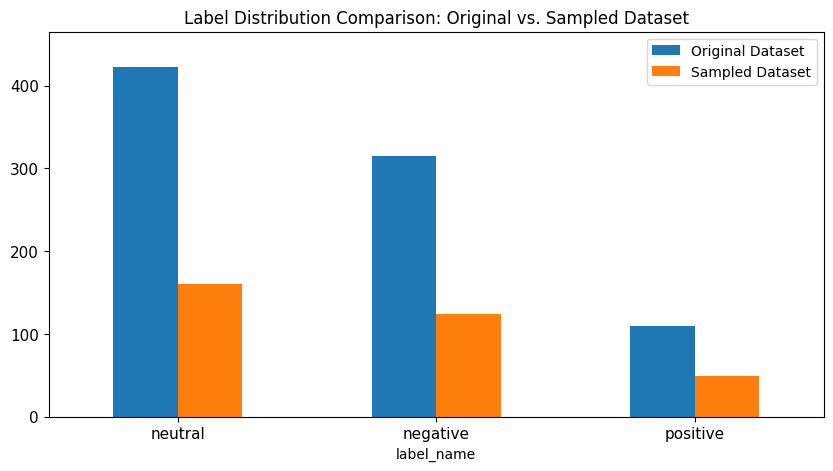

In [112]:
### EXERCISE 8 ###

# combine data frames
comparison_df = pd.DataFrame({
    'Original Dataset': X.label_name.value_counts(),
    'Sampled Dataset': X_sample.label_name.value_counts()
})

comparison_df.sort_values(by='Original Dataset', ascending=False, inplace=True)

# calculate dynamic y-axis limit
max_y = comparison_df.values.max().max() * 1.1 

# visualize side-by-side bar chart
comparison_df.plot(kind='bar',
                   title='Label Distribution Comparison: Original vs. Sampled Dataset',
                   ylim=[0, max_y],
                   rot=0,
                   fontsize=11,
                   figsize=(10,5))


In [ ]:
### EXERCISE 8 ###


# Phase 2

In [ ]:
### Begin Assignment Here